# Проект

Авторы: Панина Екатерина, Киреев Максим

Ссылка на датасет https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results/data

**Музыкальная терапия** - это использование музыки для снятия стресса, плохого настроения и для поднятия общего психического здоровья человека. МТ также признана практикой, основанной на фактических данных, использующей музыку в качестве катализатора выработки "гормонов счастья", таких как окситоцин.


Набор данных направлен на выявление того, какие корреляции существуют между музыкальным вкусом человека и его самооценкой психического здоровья, если таковые имеются. В идеале, эти результаты могли бы способствовать более осознанному применению МТ или просто дать интересные представления о психике.

###**Задачи:**
**Регрессия**: С помощью метода линейной регрессии выявить значимые взаимосвязи между музыкальными предпочтениями и психическим состоянием, что будет использовано для первичных рекомендаций.

**Кластеризация**: С помощью метода кластеризации (KMeans) сегментировать пользователей по музыкальным привычкам и психоэмоциональному фону для персонализированных рекомендаций.

## Подготовка

In [2]:
# Основные импорты
import matplotlib.colors
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Скачивание датасета из kaggle
import kagglehub
path = kagglehub.dataset_download("catherinerasgaitis/mxmh-survey-results")

In [4]:
# Для ряда визуализаций нам потребуется задавать цвета;
palette = [
    "#1ba3c6", "#2cb5c0", "#30bcad", "#21b087", "#33a65c",
    "#57a337", "#a2b627", "#d5bb21", "#f8b620", "#f89217",
    "#f06719", "#e03426", "#f64971", "#fc719e", "#eb73b3",
    "#ce69be", "#a26dc2", "#7873c0", "#4f7cba"
]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("hue_circle", palette)

## Подготовка данных

In [5]:
# Первая попытка загрузки данных
data = pd.read_csv(f"{path}/mxmh_survey_results.csv")

Взглянем на сырые данные:

In [6]:
data

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


In [8]:
data.nunique()

,0
Timestamp,735
Age,61
Primary streaming service,6
Hours per day,27
While working,2
Instrumentalist,2
Composer,2
Fav genre,16
Exploratory,2
Foreign languages,2


Взгляд сразу же бросается на аномальное больше количество ударов в минуту --- 999999999 ударов в минуту. Вгляднем внимательнее на столбец BPM:

In [9]:
data["BPM"].sort_values(ascending=False)

,BPM
568,999999999.0
644,624.0
248,220.0
610,220.0
662,218.0
...,...
688,NaN
700,NaN
706,NaN
712,NaN


In [10]:
data["BPM"].sort_values().head(10)

,BPM
339,0.0
639,0.0
524,0.0
429,4.0
567,8.0
372,20.0
421,40.0
214,52.0
427,55.0
58,55.0


Видимо некоторое количество значений NaN и два неадекватно больших значения --- 624 и 999999999 ударов в минуту. От этих строк надо будет избавиться.

Итак, видим, что нам надо:
- Избавиться от строк со значениями NaN
- Удалить столбец "Permissions", так как он содержит ровно одно уникальное значение, которое не может представлять интерес для анализа
- Удалить столбец "Timestamp", который не представляет интереса для нашего анализа
- Преобразовать столбцы "While working", "Instrumentalist", "Composer", "Exploratory", "Foreign languages", "Permissions" в тип boolean (столбцы с ровно 2 уникальными значениями - "Yes" и "No")
- Удалить строки для которых значение BPM больше, скажем, 500 (чтобы избавться от двух значений 999999999 и 624)
- Удалить из рассмотрения тех, кто слушает музыку 24/7, то есть на фоне; для этого отбросим тех, кто слушает музыку более 15 часов в день

In [11]:
# Вторая попытка загрузки данных
data = pd.read_csv(
  f"{path}/mxmh_survey_results.csv",
  true_values=["Yes"],
  false_values=["No"],
).dropna()
data = data.drop(columns=["Timestamp", "Permissions"])
data = data[(data["BPM"] > 30) & (data["BPM"] < 240)]
data = data[data["Hours per day"] <= 15]

data.reset_index(drop=True, inplace=True)

data_num = data.select_dtypes(["number"])

Также дополнительно составим список музыкальных жанров, рассматриваемых в датасете и реализуем функцию для получения имени столбца с частотой на основе имени жанра:

In [12]:
genres = [
  col.removeprefix("Frequency [").removesuffix("]")
  for col in data
  if col.startswith("Frequency")
]

def genre2col(cat):
  return f"Frequency [{cat}]"

## Обзор данных

Список столбцов:

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           603 non-null    float64
 1   Primary streaming service     603 non-null    object 
 2   Hours per day                 603 non-null    float64
 3   While working                 603 non-null    object 
 4   Instrumentalist               603 non-null    object 
 5   Composer                      603 non-null    object 
 6   Fav genre                     603 non-null    object 
 7   Exploratory                   603 non-null    bool   
 8   Foreign languages             603 non-null    object 
 9   BPM                           603 non-null    float64
 10  Frequency [Classical]         603 non-null    object 
 11  Frequency [Country]           603 non-null    object 
 12  Frequency [EDM]               603 non-null    object 
 13  Frequ

Список жанров:

In [14]:
genres

['Classical',
 'Country',
 'EDM',
 'Folk',
 'Gospel',
 'Hip hop',
 'Jazz',
 'K pop',
 'Latin',
 'Lofi',
 'Metal',
 'Pop',
 'R&B',
 'Rap',
 'Rock',
 'Video game music']

Непосредственно таблица с данными:

In [15]:
data

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,4.0,False,False,False,Video game music,False,True,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
1,61.0,YouTube Music,2.5,True,False,True,Jazz,True,True,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
2,18.0,Spotify,4.0,True,False,False,R&B,True,False,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
3,18.0,Spotify,5.0,True,True,True,Jazz,True,True,86.0,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
4,18.0,YouTube Music,3.0,True,True,False,Video game music,True,True,66.0,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,17.0,Spotify,2.0,True,True,False,Rock,True,True,120.0,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
599,18.0,Spotify,1.0,True,True,False,Pop,True,True,160.0,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
600,19.0,Other streaming service,6.0,True,False,True,Rap,True,False,120.0,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
601,19.0,Spotify,5.0,True,True,False,Classical,False,False,170.0,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


Описательные статистические данные:

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,603.0,24.593698,11.138024,10.0,18.0,21.0,27.0,80.0
Hours per day,603.0,3.568325,2.630292,0.0,2.0,3.0,5.0,15.0
BPM,603.0,124.053068,32.219149,40.0,100.0,120.0,144.5,220.0
Anxiety,603.0,5.873134,2.751184,0.0,4.0,6.0,8.0,10.0
Depression,603.0,4.880597,2.989712,0.0,2.0,5.0,7.0,10.0
Insomnia,603.0,3.788557,3.096534,0.0,1.0,3.0,6.0,10.0
OCD,603.0,2.638474,2.840642,0.0,0.0,2.0,5.0,10.0


In [17]:
data.describe(exclude="number").T

,count,unique,top,freq
Primary streaming service,603,6,Spotify,388
While working,603,2,True,480
Instrumentalist,603,2,False,406
Composer,603,2,False,498
Fav genre,603,16,Rock,148
Exploratory,603,2,True,441
Foreign languages,603,2,True,341
Frequency [Classical],603,4,Rarely,220
Frequency [Country],603,4,Never,282
Frequency [EDM],603,4,Never,246


Столбцы с частотами принимают следующие значения:

In [18]:
pd.concat([data[genre2col(cat)] for cat in genres]).unique()

array(['Never', 'Sometimes', 'Rarely', 'Very frequently'], dtype=object)

Для дальнейшего анализа данных рассмотрим следующие возрастные категории граждан: 0-18, 19-34, 35-54, 55-70.

In [19]:
ages = [0, 19, 35, 55, 71]

age_categories = [
  data[(data["Age"] >= min_age) & (data["Age"] < max_age)]
  for min_age, max_age in zip(ages, ages[1:])
]
age_categories_names = ["<18", "19-34", "35-54", ">55"]
age_categories_count = 4

Посмотрим сколько часов в день (в среднем) человек слушает музыку (по возрастным категориям)

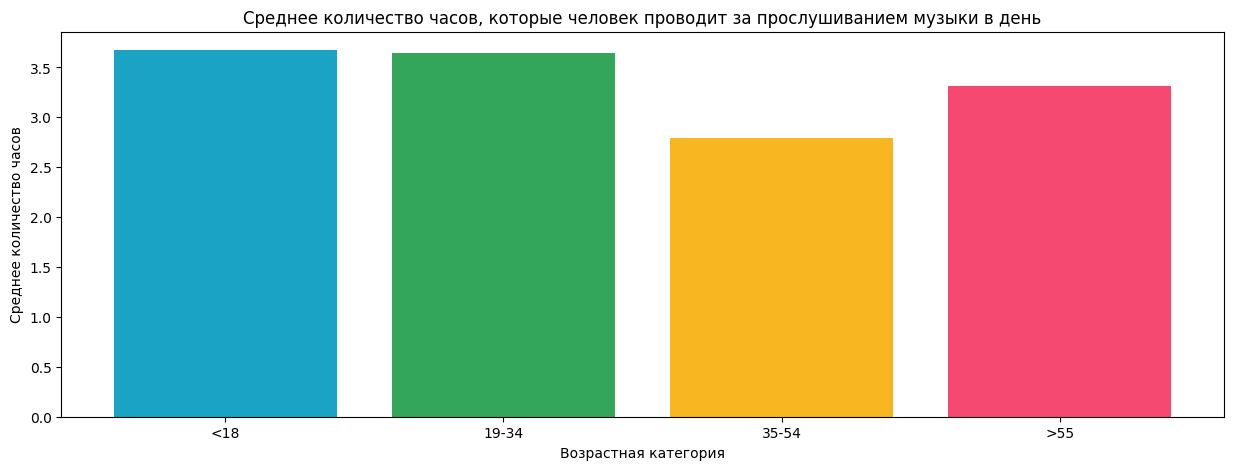

In [20]:
plt.figure(figsize=(15, 5))

plt.bar(
  age_categories_names,
  [cat["Hours per day"].mean() for cat in age_categories],
  color=palette[::4]
)
plt.title("Среднее количество часов, которые человек проводит за прослушиванием музыки в день")
plt.xlabel("Возрастная категория")
plt.ylabel("Среднее количество часов")
plt.show()

 Рассмотрим популярности жанров среди различных возрастных категорий

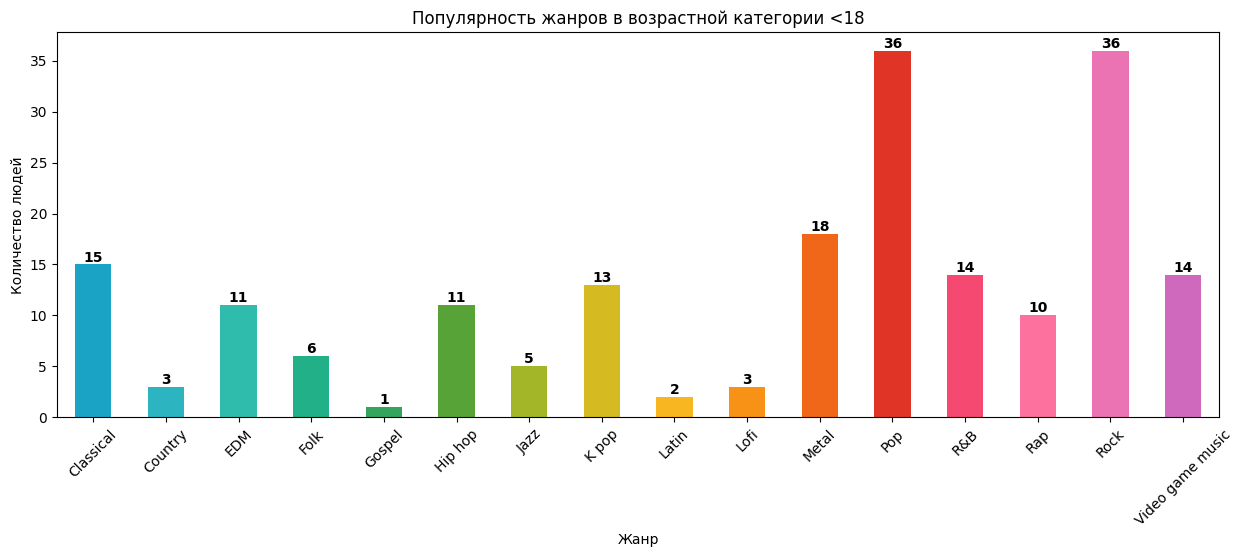

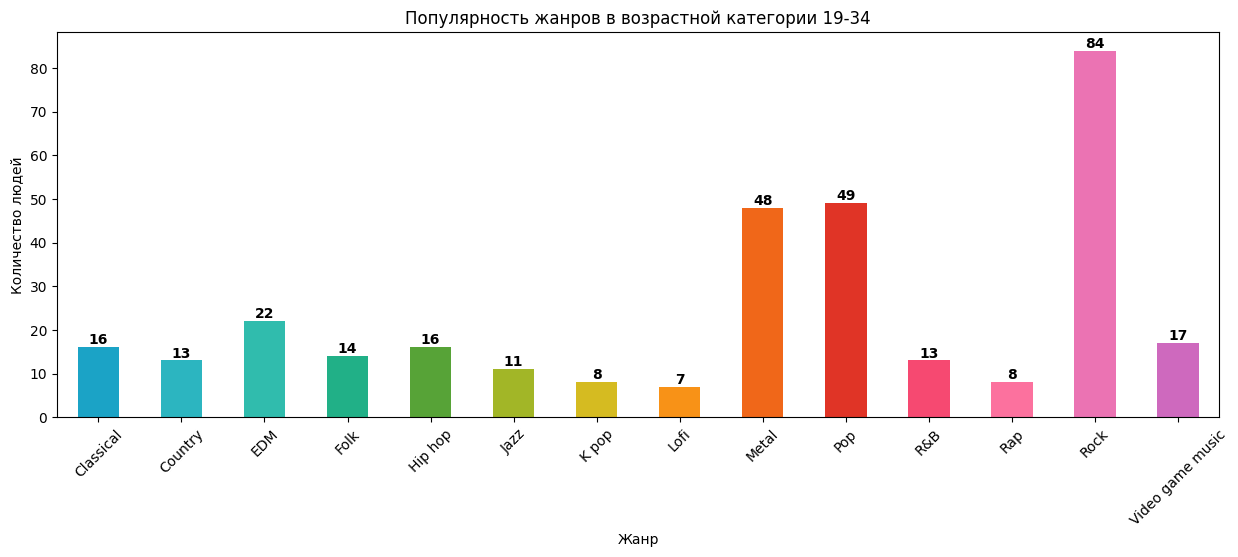

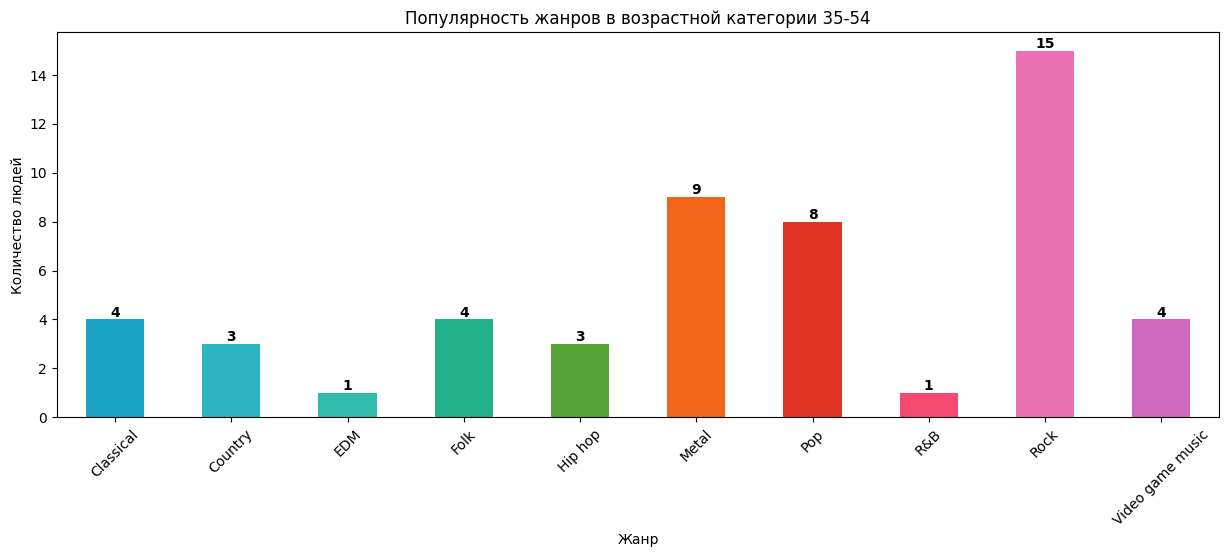

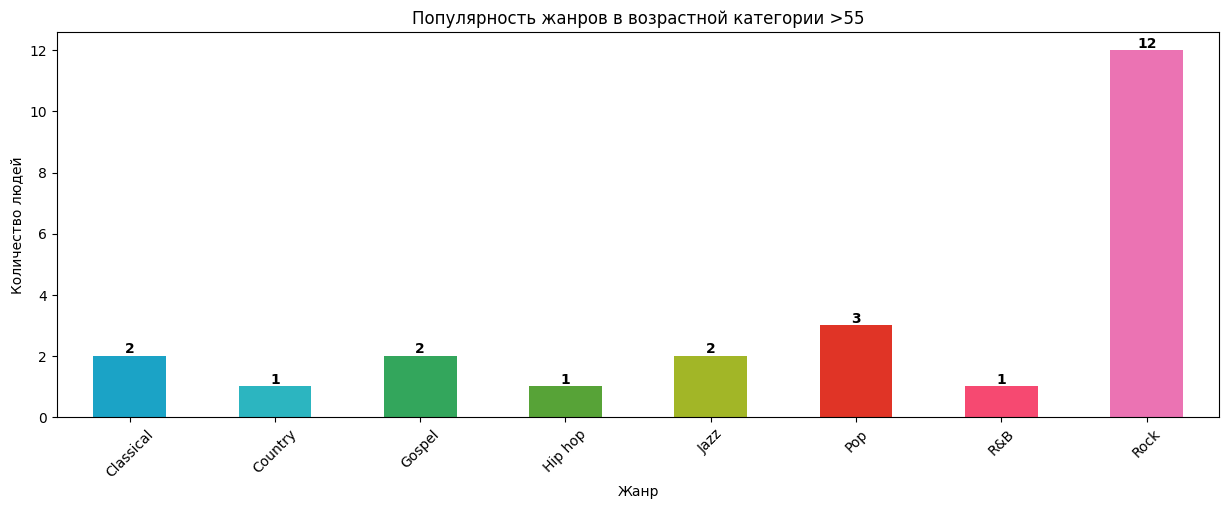

In [21]:
genre2color = dict(zip(genres, palette))

def plot(idx):
  plt.figure(figsize=(15, 5))

  counts = age_categories[idx].groupby("Fav genre").size()
  color = [genre2color[genre] for genre in counts.index]
  ax = counts.plot(kind="bar", color=color)
  ax.bar_label(ax.containers[0], fmt="%d", fontweight="bold")

  plt.title(f"Популярность жанров в возрастной категории {age_categories_names[idx]}")
  plt.xlabel("Жанр")
  plt.ylabel("Количество людей")
  plt.xticks(rotation=45)

  plt.show()

for idx in range(age_categories_count):
  plot(idx)


EDM - электронная танцевальная музыка

Gospel - евангельская музыка

R&B - ритм-н-блюз

Матрица корреляций

In [22]:
# plt.figure(figsize=(10, 10))

# # Мы можем строить корреляционную матрицу только для столбцов с числами
# df = data.select_dtypes(["number"])
# _, n, c = *df.shape, df.columns

# # Рисуем матрицу
# plt.matshow(df.corr(), cmap=colormap)

# # Рисуем подписи
# common_kwargs = dict(rotation=30, rotation_mode="anchor", va="baseline")
# plt.xticks(range(n), c, **common_kwargs, ha="left")
# plt.yticks(range(n), c, **common_kwargs, ha="right")

# # Рисуем чиселки
# for (i, j), z in np.ndenumerate(df.corr()):
#     plt.text(j, i, f"{z:0.1f}", ha="center", va="center")

# plt.show()

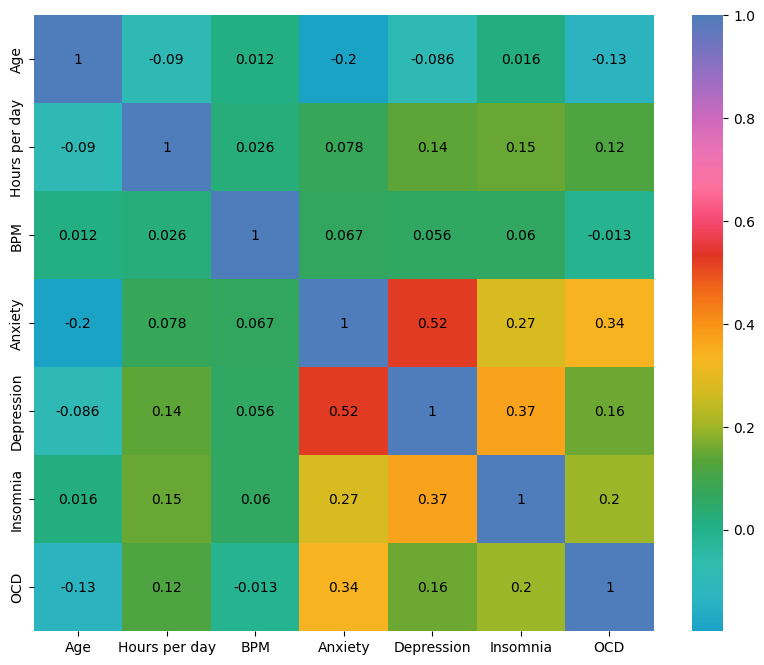

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_num.corr(), annot=True, cmap=colormap, annot_kws=dict(c="k"))
plt.show()

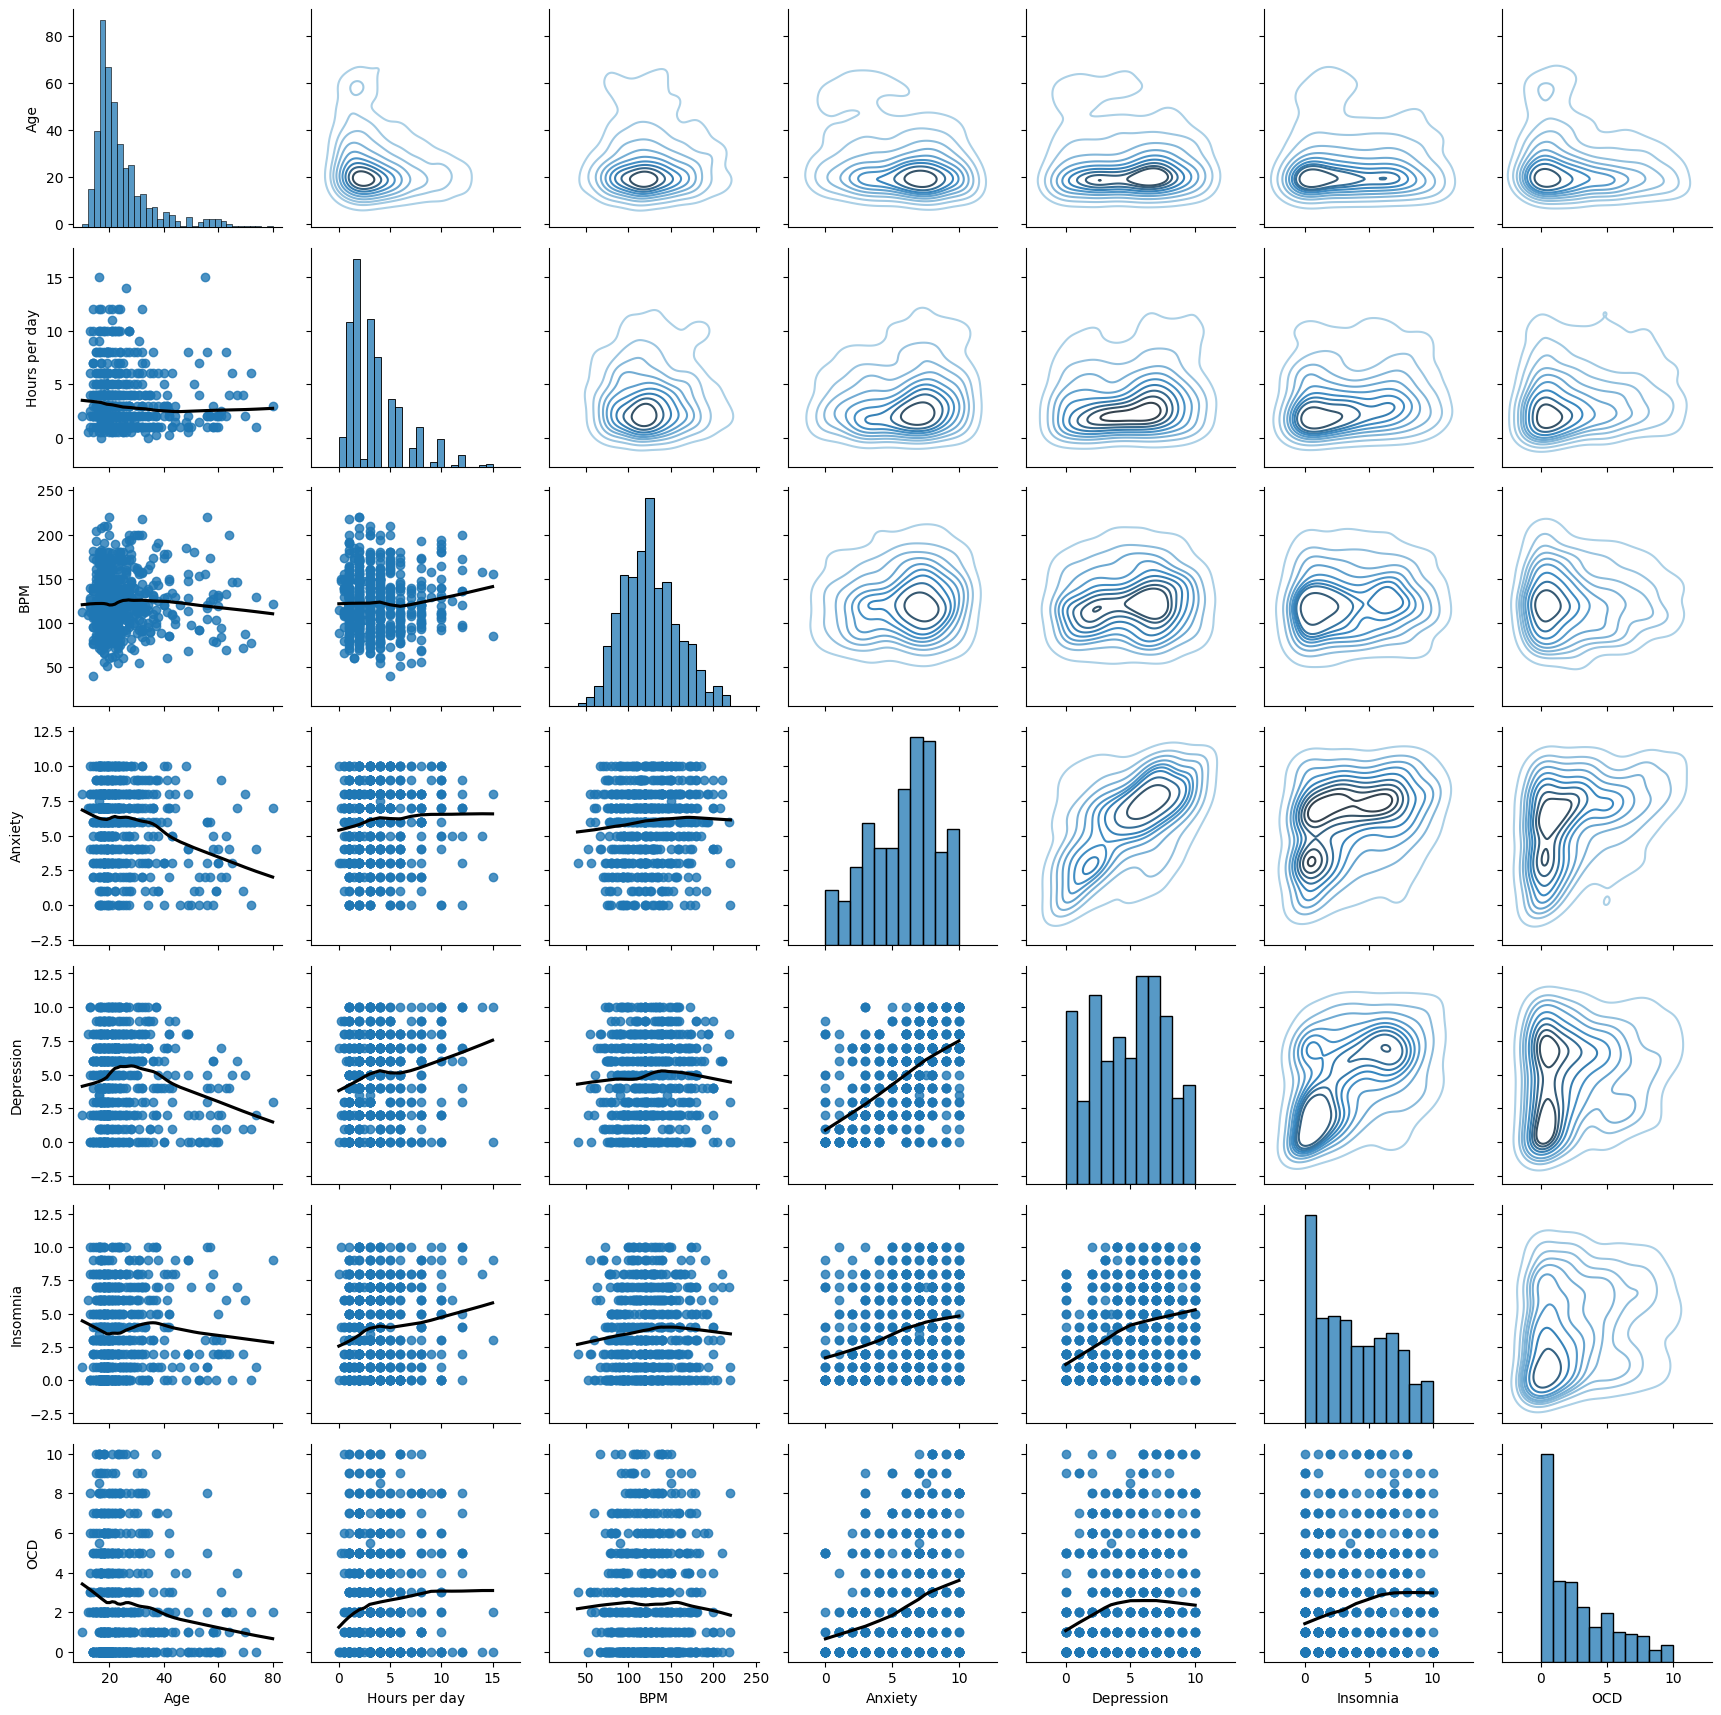

In [24]:
g = sns.PairGrid(data_num, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws=dict(color="black"))
g.map_diag(sns.histplot, kde_kws=dict(color="black"))
g.map_upper(sns.kdeplot, cmap="Blues_d")
plt.show()

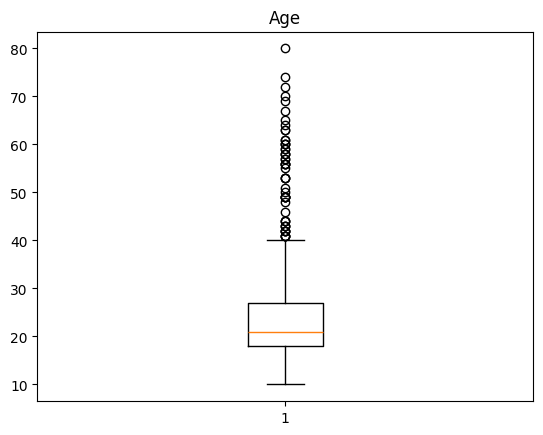

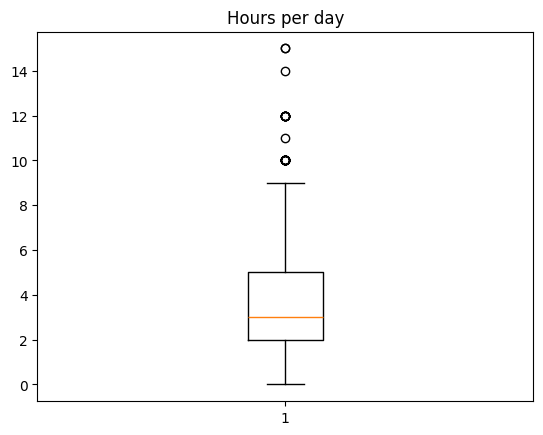

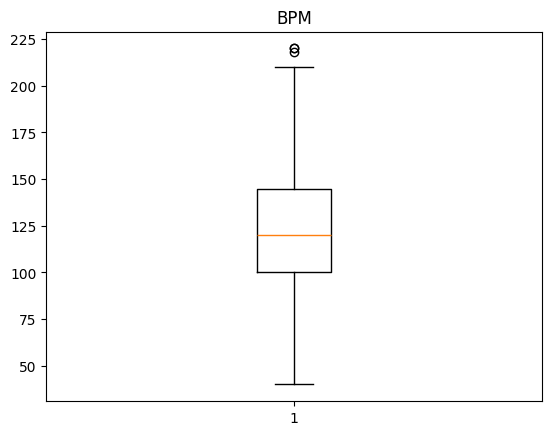

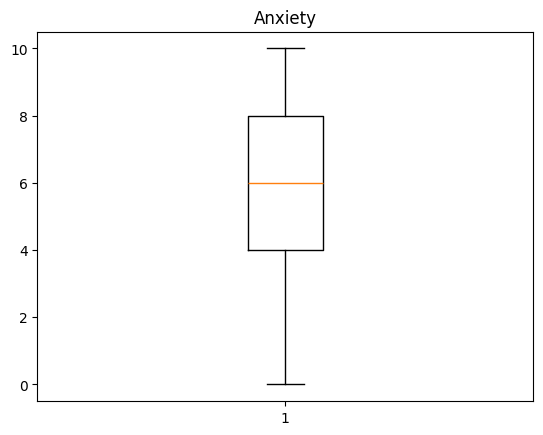

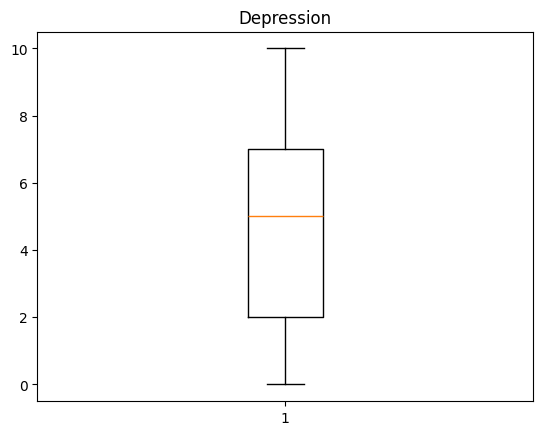

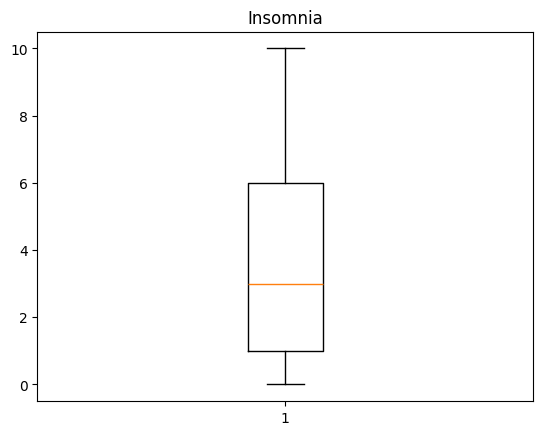

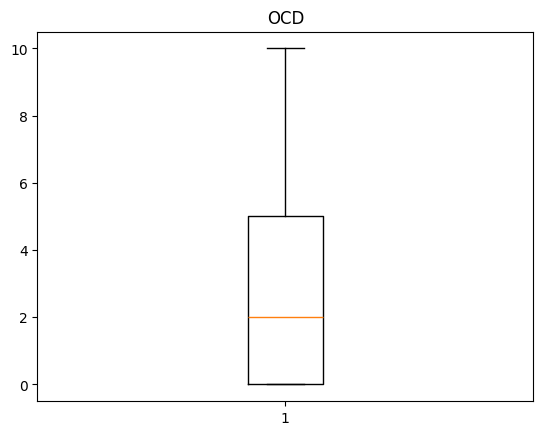

In [25]:
for col in data_num.columns:
  plt.figure()
  plt.boxplot(data[col])
  plt.title(col)
  plt.show()

Рассмотрим распределения по различным столбцам:
- Для столбцов "Age", "Hours per day" и "BPM" рассмотрим гистограммы
- Для столбцов "Anxiety", "Depression", "Insomnia" и "OCD" ( это люди по 10 бальной шкале оценивали свое состояние) рассмотрим пироговые(круговые) диаграммы
- Для столбцов "While working", "Instrumentalist", "Composer", "Exploratory" и "Foreign languages" (значения "Yes" и "No", которые мы преобразовали в boolean) рассмотрим столбчатые диаграммы
- Для столбца "Primary streaming service(основной потоковый сервис)" рассмотрим пироговую диаграмму (ее рассматриваем отдельно, так как в других пироговых диаграммах были числовые значения)
- Для столбца "Fav genre" построим столбчатые диаграммы
- Для столбцов "Frequench [{genre}]" для всех жанров рассмотрим групповую гистограмму



Далее посмотрим на распределения для "Age", "Hours per day" и "BPM"

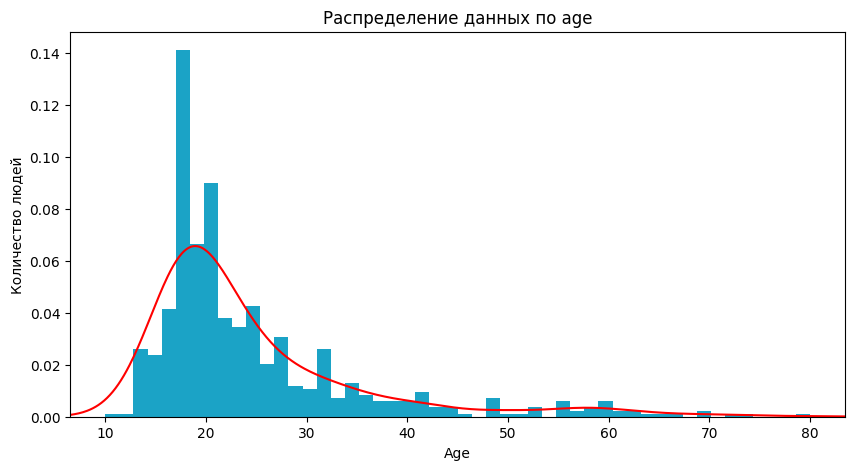

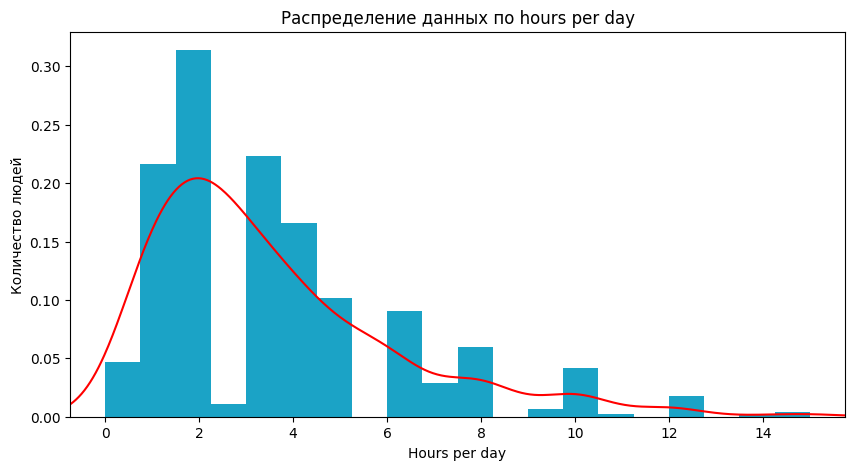

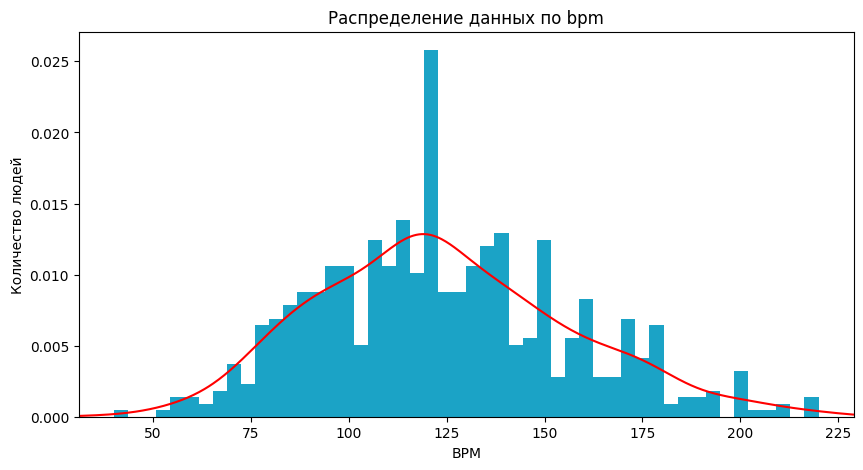

In [26]:
def plot(col):
  plt.figure(figsize=(10, 5))

  ax = data[col].plot.hist(bins=min(data[col].nunique(), 50), density=True, color=palette[0])

  xlim = ax.get_xlim()

  data[col].plot.kde(color="r", ax=ax)
  ax.set_xlim(xlim)

  plt.title(f"Распределение данных по {col.lower()}")
  plt.xlabel(col)
  plt.ylabel("Количество людей")

  plt.show()

for col in ["Age", "Hours per day", "BPM"]:
  plot(col)

Для столбцов "Anxiety", "Depression", "Insomnia" и "OCD" построим диаграммы

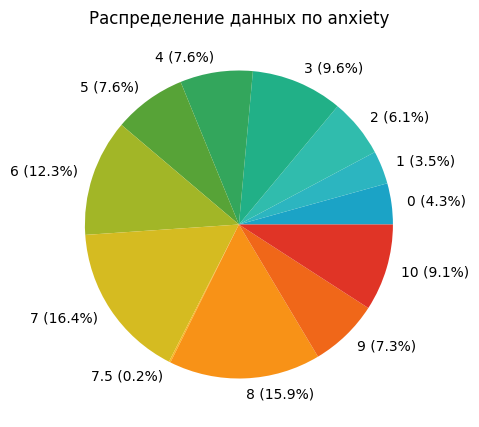

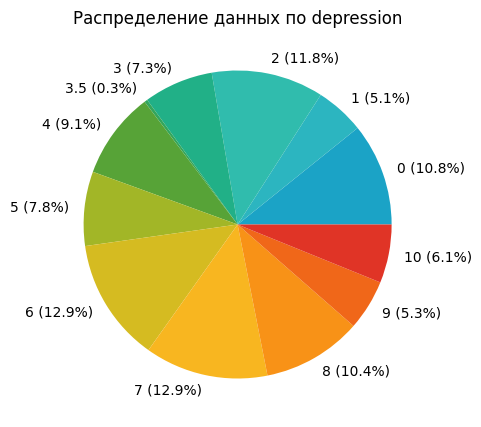

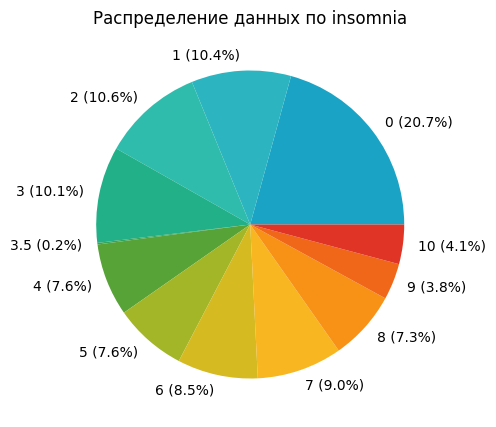

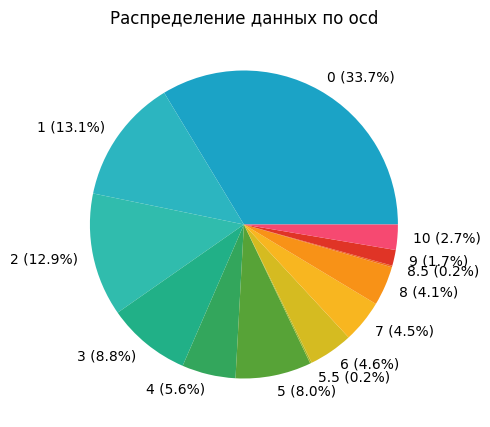

In [27]:
def nice_fmt(value, percentage):
  fmt = "%d (%.1f%%)"  if int(value) == value else "%.1f (%.1f%%)"
  return fmt % (value, percentage)

def plot(col):
  plt.figure(figsize=(10, 5))

  tmp = data.groupby(col).size()
  plt.pie(tmp.values, labels=[nice_fmt(i, 100 * tmp[i] / tmp.sum()) for i in tmp.index], colors=palette)

  plt.title(f"Распределение данных по {col.lower()}")

  plt.show()

for col in ["Anxiety", "Depression", "Insomnia", "OCD"]:
  plot(col)

Для столбцов "While working", "Instrumentalist", "Composer", "Exploratory" и "Foreign languages" рассмотрим столбчатые диаграммы

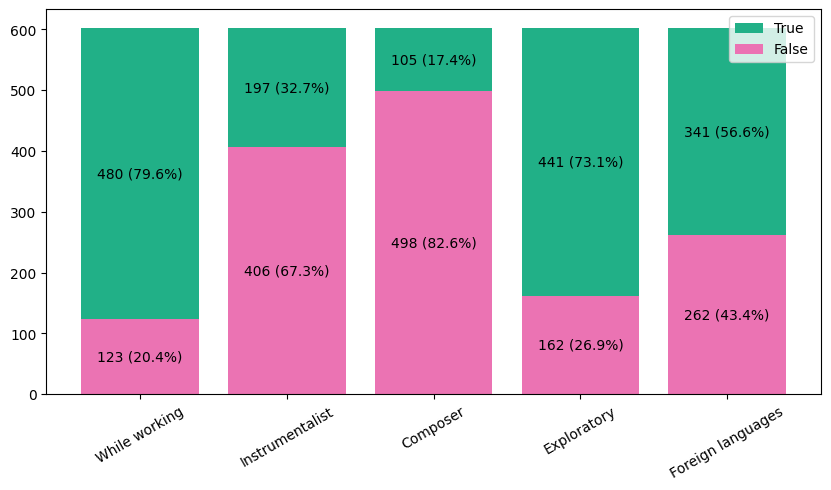

In [28]:
def plot(cols):
  plt.figure(figsize=(10, 5))

  true = data[cols].sum()
  false = len(data) - true

  p = plt.bar(cols, true, label="True", bottom=false, color=palette[3])
  q = plt.bar(cols, false, label="False", color=palette[14])

  for x in [p, q]:
    plt.bar_label(
      x,
      fmt=lambda p: nice_fmt(p, 100 * p / len(data)),
      label_type="center"
    )

  plt.legend()
  plt.xticks(rotation=30)

  plt.show()

plot(["While working", "Instrumentalist", "Composer", "Exploratory", "Foreign languages"])

Например во время работы большая часть людей слушает музыку

Для столбца основной потоковый сервис рассмотрим круговую диаграмму

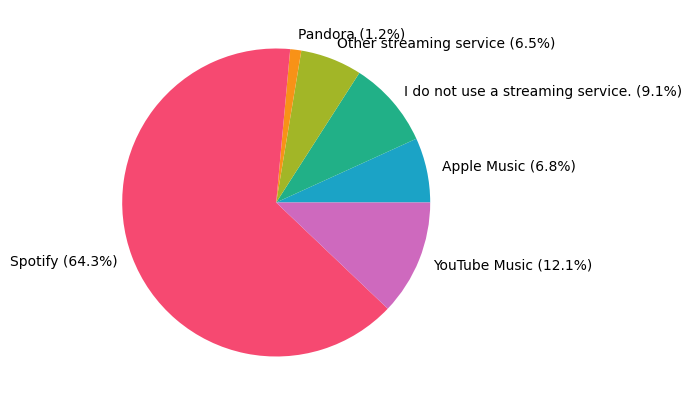

In [29]:
plt.figure(figsize=(5, 5))

tmp = data.groupby("Primary streaming service").size()
fmt = lambda s: f"{s} ({100 * tmp[s] / len(data):.1f}%)"
plt.pie(tmp.values, labels=[fmt(s) for s in tmp.index], colors=palette[::3])

plt.show()

Видим, что с огромным отрывом лидирует Spotify

А теперь построим диаграмку по жанрам

В результате выполнения этого кода получим столбчатую диаграмму, которая отображает количество людей, относящихся к различным частотным категориям (Never, Rarely, Sometimes, Very frequently) для каждого жанра из списка genres

In [30]:
# Based on https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
def barchart(figsize, data, categories, attributes, title, ylabel, palette, bar_label_fmt):
  plt.figure(figsize=figsize)

  x = np.arange(len(categories))
  width = 1 / (len(attributes) + 2)

  for i, (attribute, color) in enumerate(zip(attributes, palette)):
    measurement = [data[category, attribute] for category in categories]
    rects = plt.bar(x + width * i, measurement, width, label=attribute, color=color)
    plt.bar_label(rects, padding=3, rotation=90, fmt=bar_label_fmt)

  plt.title(title)
  plt.ylabel(ylabel)
  plt.xticks(x + width, categories)
  plt.legend(loc="upper right", ncols=len(attributes))

  a, b = min(data.values()), max(data.values())
  d = .2 * (b - a)
  plt.ylim(a - d * (a < 0), b + d * (b >= 0))
  plt.show()

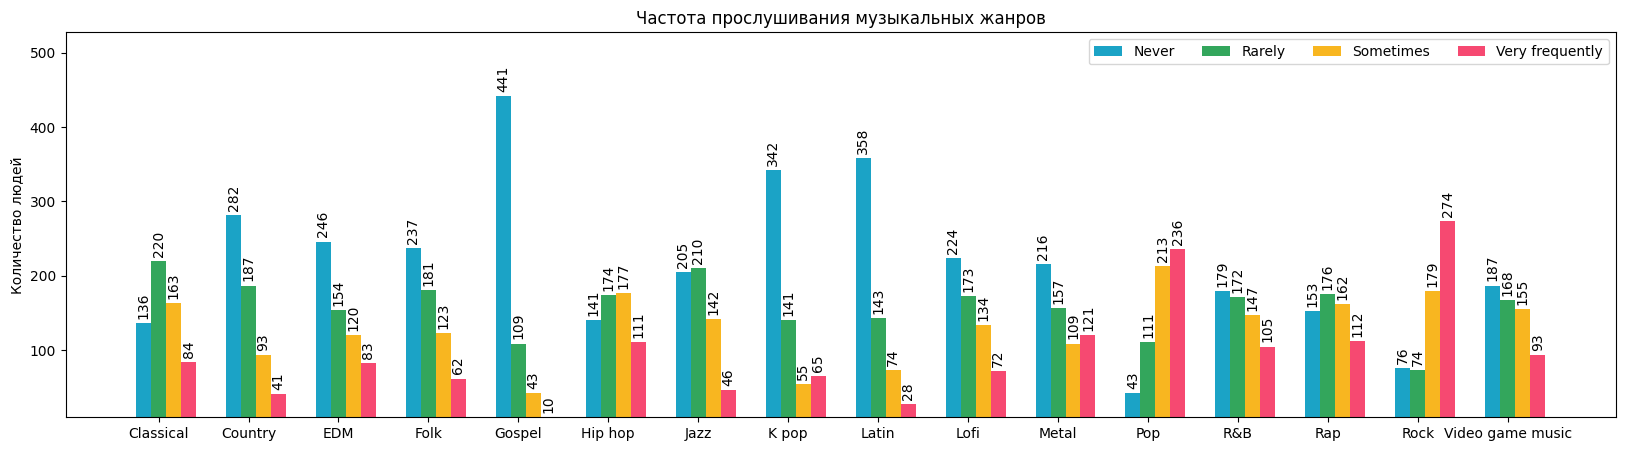

In [31]:
values = ["Never", "Rarely", "Sometimes", "Very frequently"]
counts = {
  genre: data[genre2col(genre)].value_counts()
  for genre in genres
}
counts = {
  (genre, value): counts[genre][value]
  for genre in genres
  for value in values
}

barchart((20, 5), counts, genres, values, "Частота прослушивания музыкальных жанров", "Количество людей", palette[::4], "%g")

Для топ жанра сделаем график как был выше, только без разделения на возрасные категории

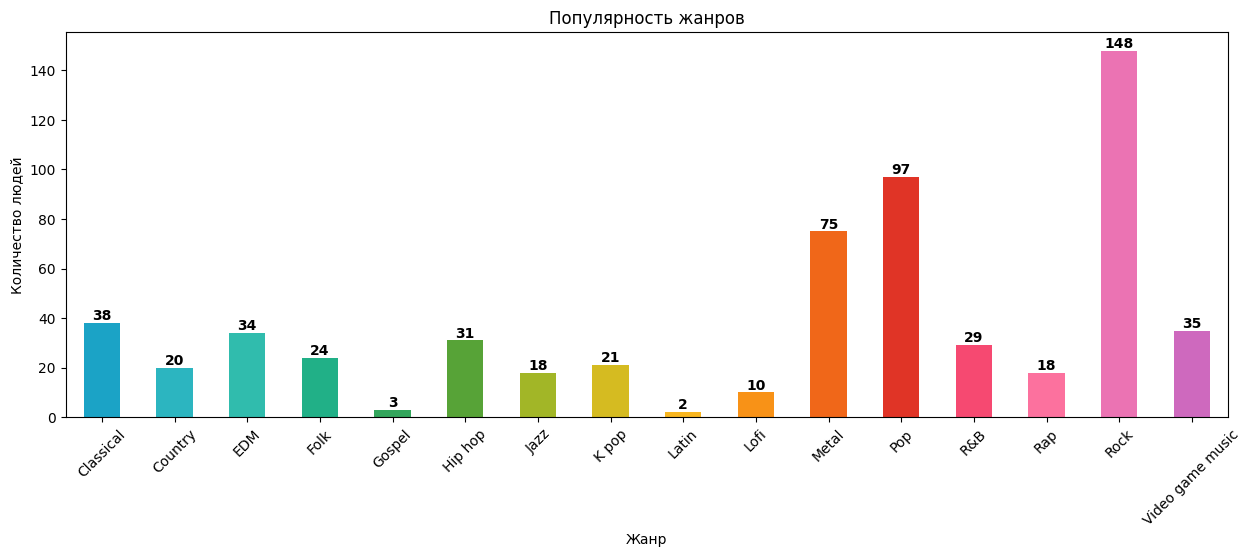

In [32]:
plt.figure(figsize=(15, 5))

counts = data.groupby("Fav genre").size()
ax = counts.plot(kind="bar", color=palette)
ax.bar_label(ax.containers[0], fmt="%d", fontweight="bold")

plt.title(f"Популярность жанров")
plt.xlabel("Жанр")
plt.ylabel("Количество людей")
plt.xticks(rotation=45)
plt.show()

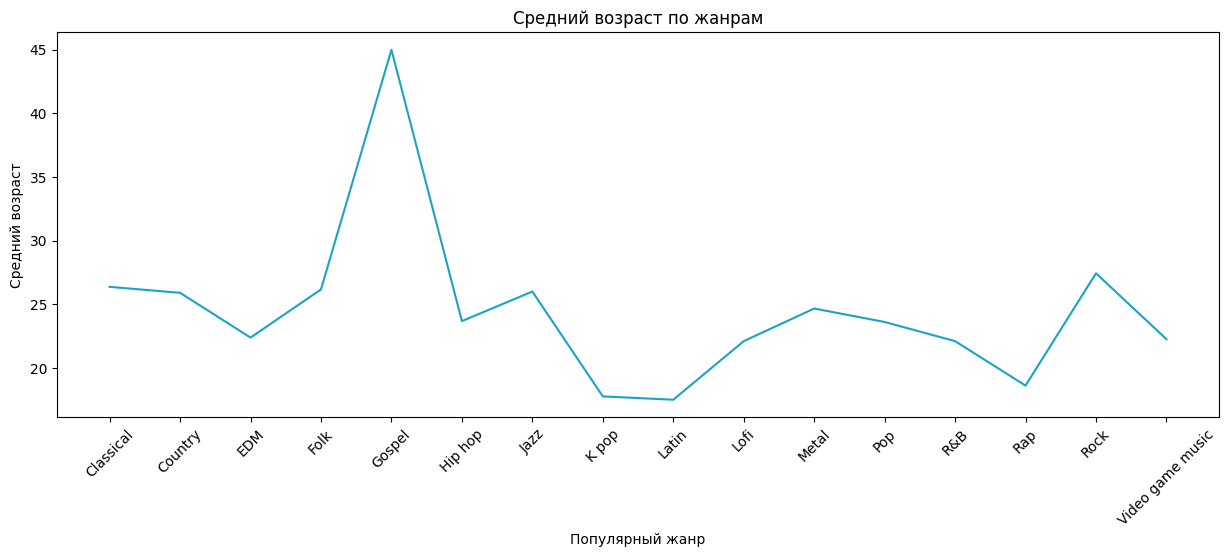

In [33]:
plt.figure(figsize=(15, 5))

d = dict(data.groupby("Fav genre")["Age"].mean())

x = np.arange(0, len(genres))
plt.plot(x, [d[genre] for genre in genres], color=palette[0])
plt.xticks(ticks=x, labels=genres, rotation=45)

plt.xlabel("Популярный жанр")
plt.ylabel("Средний возраст")
plt.title("Средний возраст по жанрам")
plt.show()

##Регрессия

Применим линейную регрессию для анализа взаимосвязи между музыкальными жанрами и психическими состояниями (тревожность, депрессия, бессонница, ОКР)

1. Подготовка данных:
   - Преобразуем категориальные данные (частота слушания жанров) в числовые значения (0-3)
   - Нормализуем данные с учётом количества часов прослушивания в день
   - Добавим столбец с единицами (intercept) для регрессии

2. Линейная регрессия:
   - Для каждого психического состояния (target) вычислим коэффициенты регрессии
   - Коэффициенты показывают, как каждый музыкальный жанр влияет на указанные состояния

3. Визуализация:
   - Построим столбчатую диаграмму коэффициентов для всех жанров и состояний




In [34]:
def ols(X, Y):
  return np.linalg.inv(X.T @ X) @ X.T @ Y

In [75]:
from sklearn.preprocessing import StandardScaler

category_order = {"Never": 0, "Sometimes": 1, "Rarely": 2, "Very frequently": 3}
targets = ["Anxiety", "Depression", "Insomnia", "OCD"]

data_linear = data[list(map(genre2col, genres))]
data_linear = data_linear.replace(category_order)
data_linear = (data_linear.T * data["Hours per day"].values / data_linear.T.sum()).T
scaler = StandardScaler()
data_linear = pd.DataFrame(scaler.fit_transform(data_linear))
data_linear = np.hstack([np.ones((data_linear.shape[0], 1)), data_linear])
betas = np.array([ols(data_linear, data[target]) for target in targets])

<ipython-input-75-8e39c0c46f74>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_linear = data_linear.replace(category_order)


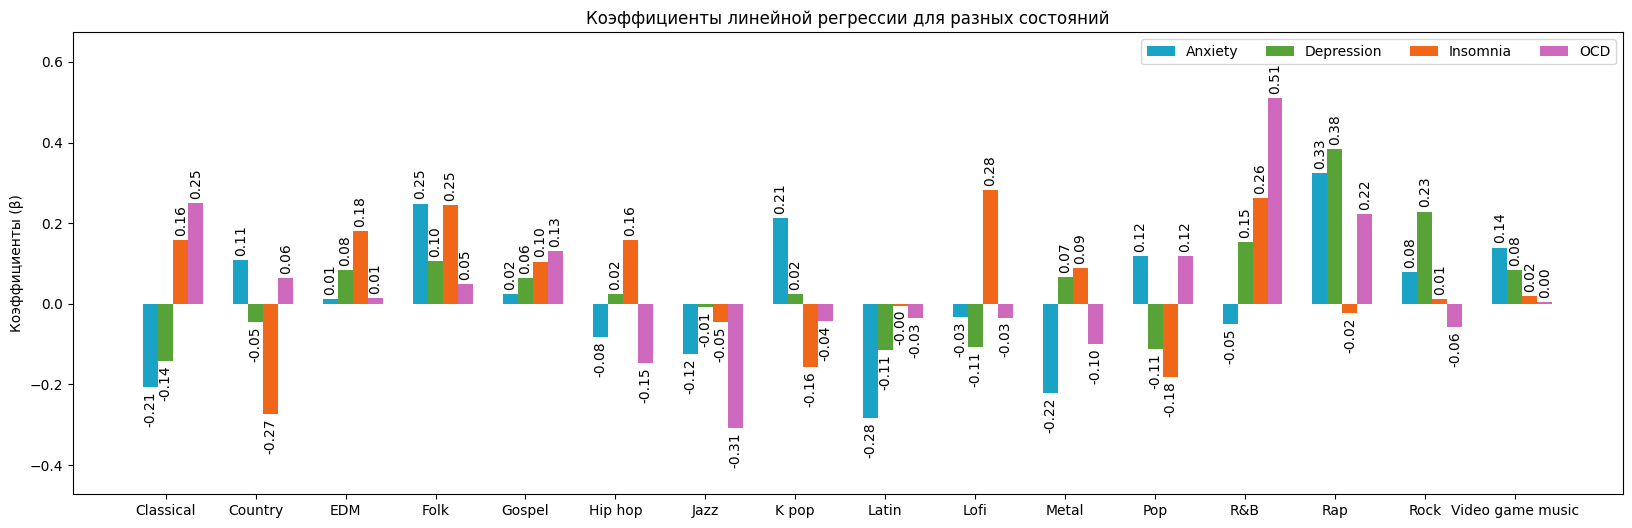

In [76]:
d = {
  (feature, targets): value
  for targets, beta in zip(targets, betas[:, 1:])
  for feature, value in zip(genres, beta)
}

title = "Коэффициенты линейной регрессии для разных состояний"
ylabel = "Коэффициенты (β)"
barchart((20, 6), d, genres, targets, title, ylabel, palette[::5], "%.2f")

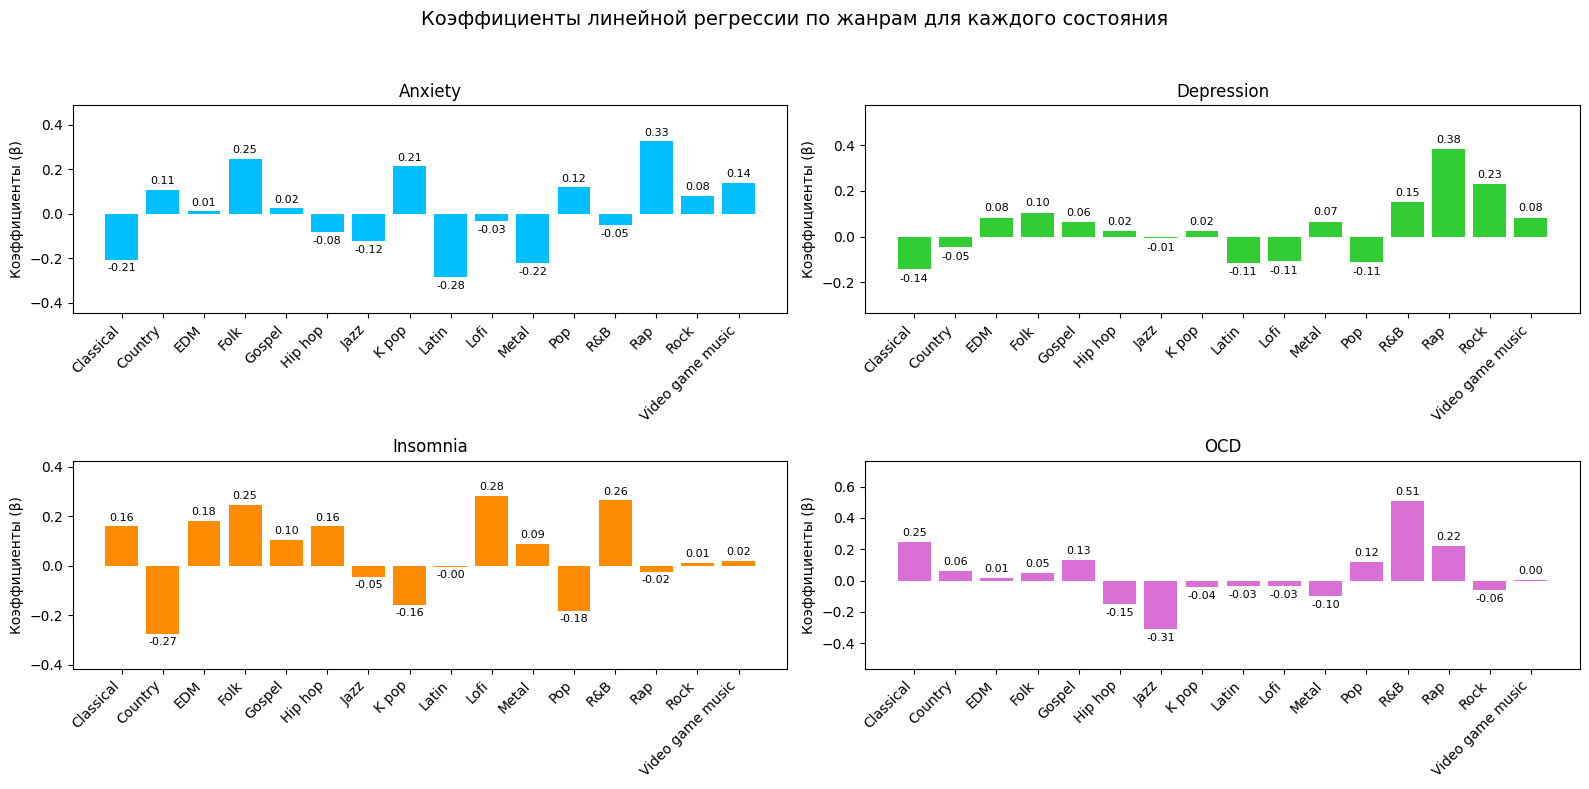

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()

titles = ["Anxiety", "Depression", "Insomnia", "OCD"]
colors = ["deepskyblue", "limegreen", "darkorange", "orchid"]

for i, ax in enumerate(axes):
    values = betas[i, 1:]
    ax.bar(range(len(genres)), values, color=colors[i])

    offset = 0.05 * max(abs(values))
    top = max(values) + 10 * offset
    bottom = min(values) - 10 * offset

    for j, val in enumerate(values):
        va = 'bottom' if val >= 0 else 'top'
        ax.text(j, val + offset if val >= 0 else val - offset, f"{val:.2f}",
                ha='center', va=va, fontsize=8)

    ax.set_title(titles[i])
    ax.set_ylabel("Коэффициенты (β)")
    ax.set_xticks(range(len(genres)))
    ax.set_xticklabels(genres, rotation=45, ha='right')
    ax.set_ylim(bottom, top)

fig.suptitle("Коэффициенты линейной регрессии по жанрам для каждого состояния", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [101]:
def predict_states(index, data, scaler, betas, genre2col, genres, targets, verbose=True):
    genre_cols = list(map(genre2col, genres))
    category_order = {"Never": 0, "Sometimes": 1, "Rarely": 2, "Very frequently": 3}

    person_genres = (
      data.loc[index, genre_cols]
      .replace(category_order)
      .infer_objects(copy=False)
    )
    person_genres = pd.to_numeric(person_genres, errors="coerce")

    if person_genres.isnull().all() or person_genres.sum() == 0:
        return [np.nan] * len(targets)

    person_raw = person_genres / person_genres.sum()
    person_raw_df = pd.DataFrame([person_raw.values], columns=genre_cols)
    person_scaled = scaler.transform(person_raw_df)[0]
    x_full = np.hstack([[1.0], person_scaled])
    preds = np.dot(betas, x_full)

    if verbose:
        print(f"\nПредсказания для пользователя #{index}:")
        for name, val in zip(targets, preds):
            print(f"  {name:<10}: {val:.2f}")

        print("\nРеальные значения (из анкеты):")
        for name in targets:
            val = data.loc[index, name] if name in data.columns else "—"
            print(f"  {name:<10}: {val}")

    return preds


In [104]:
predict_states(5, data, scaler, betas, genre2col, genres, targets)




Предсказания для пользователя #5:
  Anxiety   : 5.85
  Depression: 4.59
  Insomnia  : 3.32
  OCD       : 2.08

Реальные значения (из анкеты):
  Anxiety   : 5.0
  Depression: 3.0
  Insomnia  : 5.0
  OCD       : 3.0





<ipython-input-101-40802e77154d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(category_order)


array([5.84952697, 4.59115579, 3.3166061 , 2.07508418])

<ipython-input-38-3a3553cd76bb>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  trn = trn.replace(category_order)


<Axes: title={'center': 'R2_OCD'}, xlabel='Model'>

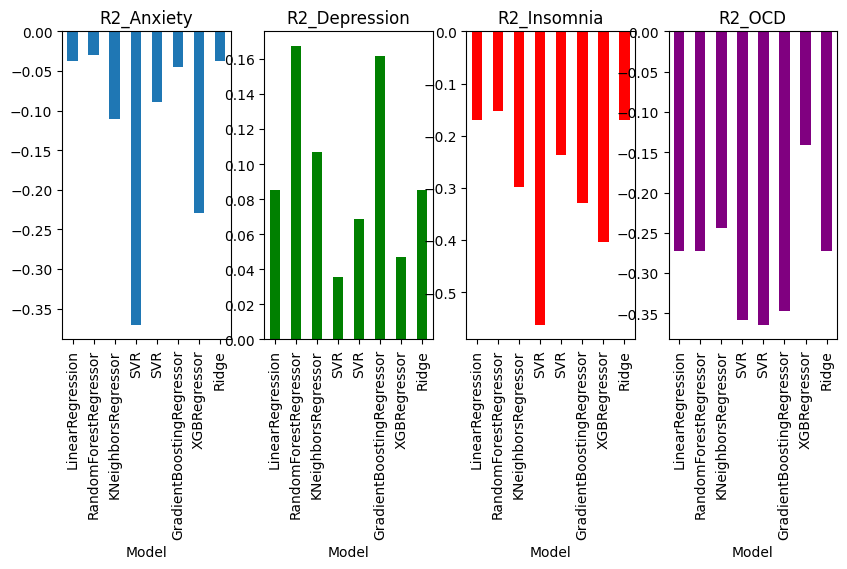

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

category_order = {"Never": 0, "Sometimes": 1, "Rarely": 2, "Very frequently": 3, "Worsen": -1, "No effect": 0, "Improve": 1}
targets = ["Anxiety", "Depression", "Insomnia", "OCD"]

trn = data

df_num = trn.select_dtypes(include='number')
Ni = 1.
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

mask = ~((df_num < (Q1 - Ni * IQR)) | (df_num > (Q3 + Ni * IQR))).any(axis=1)

trn = trn[mask]
trg = trn[targets]
trn = pd.get_dummies(trn, columns=['Fav genre'], drop_first=True)
trn = trn.replace(category_order)
trn = trn.drop(targets + ['Primary streaming service', 'Instrumentalist'], axis=1)

scaler = StandardScaler()
trn = pd.DataFrame(scaler.fit_transform(trn))

models =  [
          LinearRegression(), # метод наименьших квадратов
          RandomForestRegressor(n_estimators=50), # случайный лес
          KNeighborsRegressor(n_neighbors=8), # метод ближайших соседей
          SVR(kernel='linear'), # метод опорных векторов с линейным ядром
          SVR(kernel='rbf'),
          GradientBoostingRegressor(n_estimators=50),
          XGBRegressor(n_estimators=50),
          Ridge(alpha=1.0)
          ]


# Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.04)
Xtrn, Xtest, Ytrn, Ytest = trn[20:], trn[:20], trg[20:], trg[:20]
TestModels = pd.DataFrame()

for model in models:
    tmp = {}
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    for i in range(Ytrn.shape[1]):
        model.fit(Xtrn, Ytrn.iloc[:, i])
        for f, k in zip(Ytest.iloc[:, i], model.predict(Xtest)):
          # print(f, k, abs(f - round(k)))
          tmp['R2_Y%s' % str(i+1)] = r2_score(Ytest.iloc[:, i], np.round(model.predict(Xtest)))
        # print(tmp)
    TestModels = pd.concat([TestModels, pd.DataFrame([tmp])], ignore_index=True)

TestModels.set_index('Model', inplace=True)

fig, axes = plt.subplots(ncols=4, figsize=(10,4))
TestModels.R2_Y1.plot(ax=axes[0], kind='bar', title='R2_Anxiety')
TestModels.R2_Y2.plot(ax=axes[1], kind='bar', color='green', title='R2_Depression')
TestModels.R2_Y3.plot(ax=axes[2], kind='bar', color='red', title='R2_Insomnia')
TestModels.R2_Y4.plot(ax=axes[3], kind='bar', color='purple', title='R2_OCD')

Всё, что больше 0.05 по модулю - статистически значимо


### Другой вариант линейной регрессии

<ipython-input-39-60be29eb6ff3>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_raw = data[genres].replace({"Never": 0, "Rarely": 1, "Sometimes": 2, "Very frequently": 3})


<Figure size 1600x500 with 0 Axes>

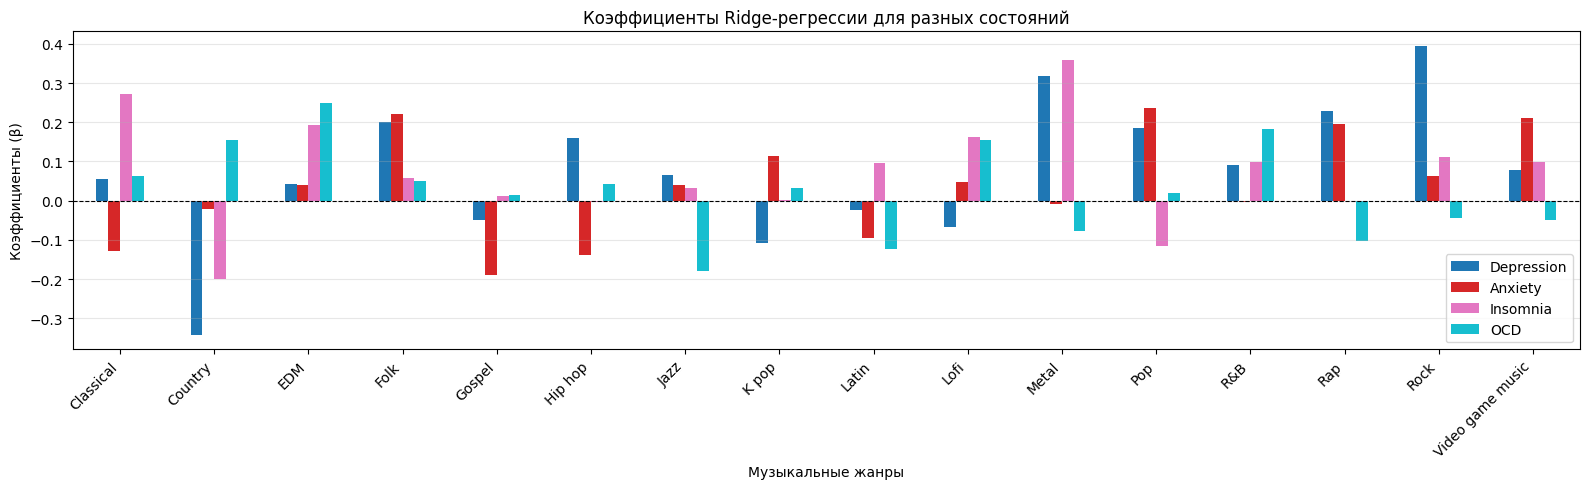

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

genres = [col for col in data.columns if col.startswith("Frequency")]
mental_cols = ['Depression', 'Anxiety', 'Insomnia', 'OCD']

X_raw = data[genres].replace({"Never": 0, "Rarely": 1, "Sometimes": 2, "Very frequently": 3})

valid_idx = X_raw.dropna().index.intersection(data[mental_cols].dropna().index)
X_clean = X_raw.loc[valid_idx]
Y_clean = data.loc[valid_idx, mental_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

alphas = 1.0
coefs = {}

for target in mental_cols:
    y = Y_clean[target].values
    model = Ridge(alpha=alphas)
    model.fit(X_scaled, y)
    coefs[target] = model.coef_

genre_names = [col.split("[")[-1].replace("]", "") for col in genres]
coef_df = pd.DataFrame(coefs, index=genre_names)

plt.figure(figsize=(16, 5))
coef_df.plot(kind="bar", figsize=(16, 5), colormap="tab10")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title("Коэффициенты Ridge-регрессии для разных состояний")
plt.ylabel("Коэффициенты (β)")
plt.xlabel("Музыкальные жанры")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()



#### 1. Тревожность (Anxiety)  
Самые полезные жанры (наибольшие отрицательные β):  
- Латинская (сальса, бачата) – ритмичность и позитивная энергия снижают напряжение.  
- Классическая музыка (Моцарт) – гармоничные структуры успокаивают нервную систему.  
- Метал (некоторые поджанры) – для части людей может работать как катарсис (выплеск эмоций).  
- Джаз (кул-джаз) – сложные гармонии отвлекают от тревожных мыслей.  

Самые вредные жанры (наибольшие положительные β):  
- K-pop – из-за гиперстимуляции (быстрая смена ритмов, высокие частоты).  
- Рэп (особенно агрессивный) – провоцирует цикличные негативные мысли.  
- Фолк (некоторые депрессивные направления) – может усиливать тревогу.  
- Музыка из игр (боевые саундтреки) – вызывает гипервозбуждение.  

Рекомендация:  
- Утренний ритуал: 20-30 минут латинской музыки (например, Marc Anthony) для заряда энергией.  
- Вечернее расслабление: струнные квартеты (Бетховен) или джазовые баллады (Miles Davis).  
- Избегать: прослушивания тревожных жанров


#### 2. Депрессия (Depression)  
Лучшие жанры:  
- Латинская (румба, ча-ча-ча) – танцевальные ритмы стимулируют выработку эндорфинов.  
- Классическая музыка (Шопен, Шуберт) – мягкие тональности.  

Худшие жанры:  
- Рэп (треки с депрессивными текстами) – фиксация на негативе.  
- R&B (меланхоличные баллады) – могут углублять подавленность.  
- Рок  – агрессия.  

Рекомендация:  
- Терапевтический плейлист:  
  - Утро: Marc Anthony– для мотивации.  
  - День: Vivaldi– тонизирующий эффект.  
-  Исключить: песни с текстами о потере, одиночестве.  


#### 3. Бессонница (Insomnia)  
Наиболее эффективные жанры:  
- Кантри (акустические баллады) – монотонный ритм гитар.  
- K-pop (только медленные баллады) – например, BTS «Spring Day».  
- Поп (инструментальные версии) – без резких переходов.  

Наименее подходящие:  
- Лофи (некоторые треки) – из-за навязчивых битов.  
- R&B (сложные ритмы) – мешают засыпанию.  
- Фолк (кельтские мотивы) – могут будить ассоциациями.  

Рекомендация:  
- За 1 час до сна:  
  - Альбом «Golden Hour» (Kacey Musgraves) – акустическое кантри.  
  - Инструментальные каверы на поп-хиты (например, Piano Guys).  
- Гаджеты: использовать режим «сон» с постепенным уменьшением громкости.  


#### 4. ОКР (OCD)  
Оптимальные жанры:  
- Джаз (биг-бенд) – предсказуемые ритмические структуры.  
- Хип-хоп (старая школа: A Tribe Called Quest) – размеренные биты.  

Проблемные жанры:  
- R&B – нарушение ритмического ожидания.  
- Рэп – хаотичный флоу(манера исполнения).  
- Классическая музыка (авангард: Шёнберг) – диссонансы.  

Рекомендация:  
- Для концентрации:  
  - Альбом «Kind of Blue» – модальный джаз.  
  - Инструментальный хип-хоп (Nujabes).  
- Избегать: свободной импровизации и резких звуковых эффектов.  


### Дополнительные советы  
1. Дозировка:  Положительный эффект проявляется при умеренном прослушивании (1-2 часа в день). Злоупотребление даже "полезными" жанрами может дать обратный эффект.


2. Комбинирование:  
   - Утро: латинские ритмы (энергия).  
   - День: джаз/классика (концентрация).  
   - Вечер: кантри/поп (релакс).  


Рекомендации:

Для снижения тревожности: классика, латиская.

Для улучшения сна: кантри.

При депрессии: избегать жанров с негативной лирикой, слушать классику и латинскую.

## Кластеризация

Вначале импортируем необходимые библиотеки:

In [40]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Подготовка данных для кластеризации

На этом этапе мы подготавливаем данные пользователей для кластеризации:

- **Числовые признаки**: мы используем возраст (`Age`), количество часов прослушивания музыки в день (`Hours per day`), переменную `While working` (переводим ответы "Yes" и "No" в нули и единицы).

- **Кодирование частот жанров**: преобразуем текстовые ответы ('Never', 'Rarely', ...) в числовые значения от 0 до 3.

- **Формирование итоговой таблицы признаков (`x_full`)**: объединяем числовые переменные и жанры.

- **Масштабирование**: применяем `StandardScaler`, чтобы все признаки имели среднее значение 0 и стандартное отклонение 1. Это важно, так как KMeans чувствителен к масштабу признаков.


In [41]:
cols_base = ['Hours per day', 'While working', 'Age']
frequency_cols = [col for col in data.columns if col.startswith('Frequency')]
data_clean = data[cols_base + frequency_cols].copy()

genres_freq = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}
for col in frequency_cols:
    data_clean[col] = data_clean[col].map(genres_freq)

categorical = ['While working']
work = OneHotEncoder(sparse_output=False)
work_data = pd.DataFrame(
    work.fit_transform(data_clean[categorical]),
    columns=work.get_feature_names_out(categorical),
    index=data_clean.index
)

numerical = ['Hours per day', 'Age']
x_full = pd.concat([
    data_clean[numerical + frequency_cols],
    work_data
], axis=1)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_full)

#### Подбор оптимального количества кластеров с помощью KMeans

На этом этапе мы определяем, сколько кластеров лучше всего использовать для KMeans, используя два метода:

**1. Elbow Method**
- Мы обучаем KMeans для количества кластеров от 2 до 10.
- Для каждого количества кластеров сохраняем значение искажения — суммы квадратов расстояний от точек до своих центров кластеров.
- Если на графике видно, что при увеличении числа кластеров искажение перестаёт сильно уменьшаться — это и есть "локоть" (оптимум).



**2. Silhouette Score**

Для каждой точки рассчитываются:
  - $a(i)$ — среднее расстояние до всех точек в своём кластере;
  - $b(i)$ — среднее расстояние до точек в ближайшем другом кластере.
  - Затем вычисляется коэффициент силуэта:
$s(i) = \frac{b(i) - a(i)}{\max(a(i),\ b(i))}$

Значения:
  - ближе к **+1** — точка хорошо "вписана" в свой кластер;
  - около **0** — на границе между двумя кластерами;
  - ближе к **–1** — точка, скорее всего, попала в чужой кластер.
В коде мы используем среднее значение $s(i)$  по всем точкам как итоговую метрику.


**3. Визуализация:**
- Первый график: зависимость искажения от количества кластеров (метод локтя).
- Второй график: Silhouette Score для каждого числа кластеров.

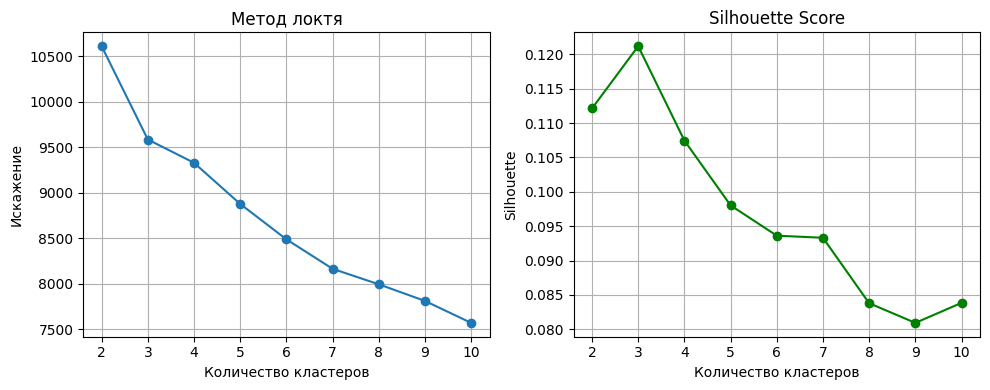



Лучший Silhouette Score при n_clusters = 3, значение: 0.1212


In [42]:
range_n = range(2, 11)

inertias, silhouettes = [], []

for n in range_n:
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(x_scaled)
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(x_scaled, labels)
    silhouettes.append(sil_score)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range_n, inertias, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Искажение')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range_n, silhouettes, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette')
plt.grid(True)

plt.tight_layout()
plt.show()

best_n = range_n[np.argmax(silhouettes)]
print('\n')
print(f"Лучший Silhouette Score при n_clusters = {best_n:.0f}, значение: {max(silhouettes):.4f}")

- **Метод локтя** показывает, как уменьшается искажение (inertia) при увеличении числа кластеров.  
  После $n = 3$ снижение становится менее выраженным — это и есть "локоть", где добавление новых кластеров даёт всё меньший прирост.

- **Silhouette Score** оценивает качество кластеризации: насколько чётко точки принадлежат своим кластерам.  
  Максимальное значение этой метрики достигается также при $n = 3$, что подтверждает наличие чёткой структуры при этом количестве групп.


#### Кластеризация KMeans и визуализация
- Теперь, определившись с количеством кластеров, можем применить KMeans.
- Для визуализации кластеров используем PCA (метод главных компонент), который позволяет наши данные, представленные в 20-мерном пространстве, перевести в 2-мерное пространство, что позволяет увидеть разбиение данных на кластеры.
- PCA находит 20 собственных векторов ковариационной матрицы данных (направления главных компонент). Выбирает 2 из них с наибольшими собственными значениями — они соответствуют наибольшей доле общей дисперсии и потом проецирует все точки на это новое 2-мерное подпространство.

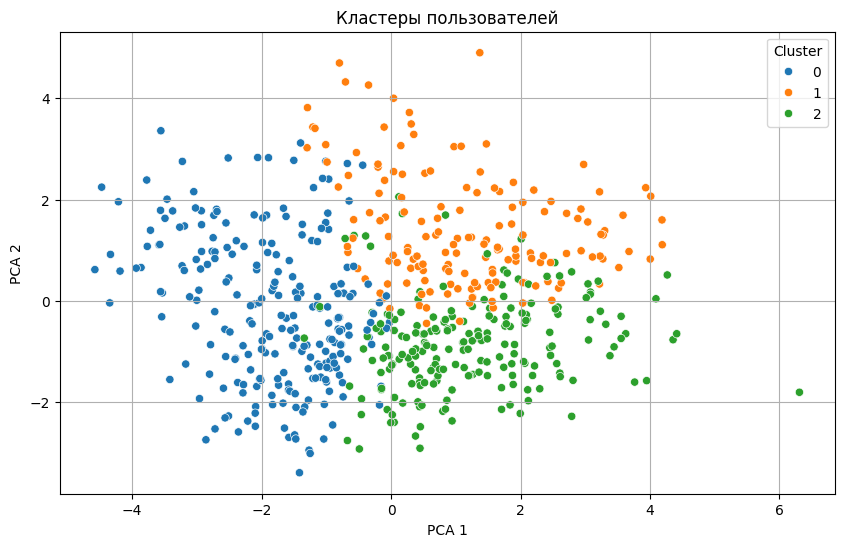

In [43]:
kmeans = KMeans(n_clusters=3, random_state=54)
labels = kmeans.fit_predict(x_scaled)
data_clean['Cluster'] = labels

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=data_clean['Cluster'], palette='tab10')
plt.title('Кластеры пользователей')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

Теперь можем поподробнее изучить, какие пользователи относятся к каким кластерам.

Для каждого кластера выведем средние значения признаков, а также средние любимые жанры.

Общие данные про кластеры:
Кластер 0:
        - Среднее время прослушивания: 2.8 ч
        - Средний возраст: 27.5 лет
        - Любимые жанры: Rock, Pop, Classical
------------------------------------------------------------
Кластер 1:
        - Среднее время прослушивания: 3.6 ч
        - Средний возраст: 20.1 лет
        - Любимые жанры: Pop, Hip hop, Rap
------------------------------------------------------------
Кластер 2:
        - Среднее время прослушивания: 4.4 ч
        - Средний возраст: 24.6 лет
        - Любимые жанры: Rock, Pop, Hip hop
------------------------------------------------------------


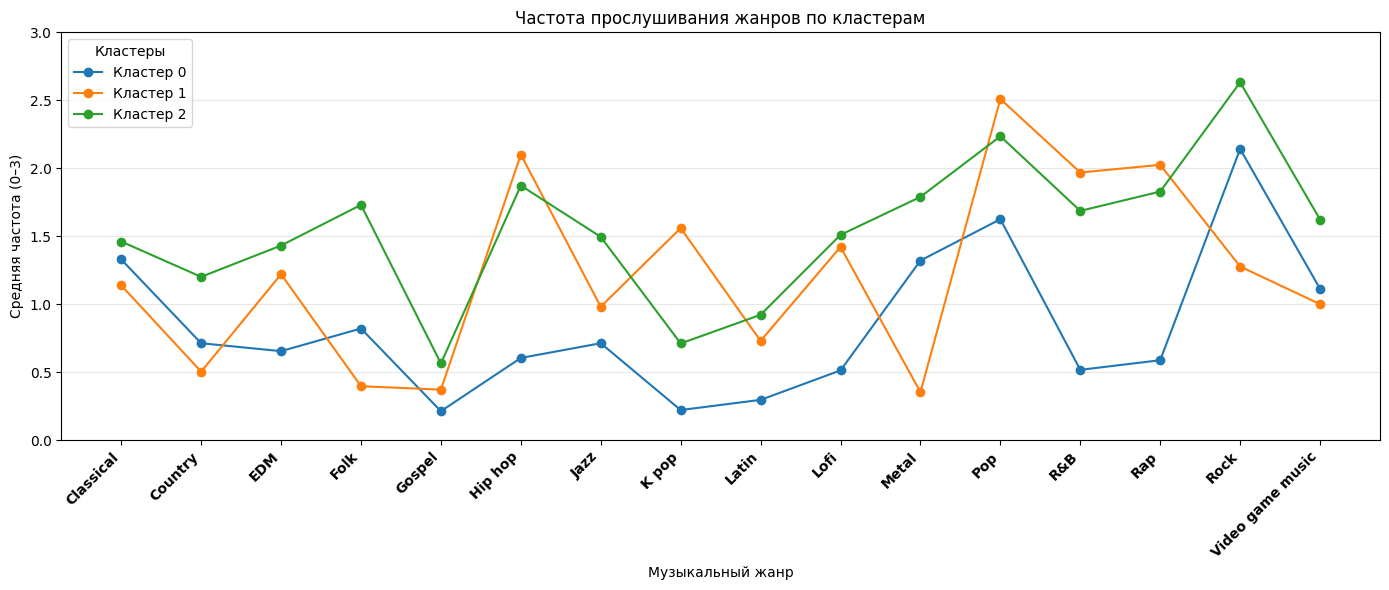

In [44]:
summary = data_clean.groupby('Cluster')[['Hours per day', 'Age']].mean()
genre_distribution = data_clean.groupby('Cluster')[frequency_cols].mean()

def top_genres(row, n=3):
    top = row.dropna().sort_values(ascending=False).head(n)
    return [col.split('[')[-1].replace(']', '') for col in top.index]

def interpret_cluster(cluster_id, means_row, genre_row):
    genres = top_genres(genre_row)
    return f"""Кластер {cluster_id}:
        - Среднее время прослушивания: {means_row['Hours per day']:.1f} ч
        - Средний возраст: {means_row['Age']:.1f} лет
        - Любимые жанры: {', '.join(genres) if genres else 'нет данных'}
        """.strip()

print("Общие данные про кластеры:")
for cluster_id in summary.index:
    if cluster_id in genre_distribution.index:
        desc = interpret_cluster(
            cluster_id,
            summary.loc[cluster_id],
            genre_distribution.loc[cluster_id]
        )
        print(desc)
        print('-' * 60)

plt.figure(figsize=(14, 6))
for cluster_id, row in genre_distribution.iterrows():
    genres = row.index.str.extract(r'Frequency \[(.*?)\]')[0]
    plt.plot(genres, row.values, marker='o', label=f'Кластер {cluster_id}')

plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.title('Частота прослушивания жанров по кластерам')
plt.xlabel('Музыкальный жанр')
plt.ylabel('Средняя частота (0–3)')
plt.ylim(0, 3)
plt.grid(True, axis='y', alpha=0.3)
plt.legend(title='Кластеры')
plt.tight_layout()
plt.show()


### 📊 Выводы по кластерам

На основе кластеризации пользователей по музыкальным предпочтениям и возрасту и времени прослушивания музыки можно выделить следующие моменты:

---

#### 🟦 Кластер 0:
- **Наименее вовлечённая группа**: слушают музыку в среднем 2.8 часа в день.
- **Самые старшие**: средний возраст — 27.5 лет.
- **Предпочтения**: Rock, Pop, Classical.
- **Особенности**:
  - На фоне остальных — меньше интереса к Hip hop, Rap, K-pop.
  - Выше интерес к более «традиционным» жанрам (Classic, Rock).

---

#### 🟧 Кластер 1:
- **Среднеактивные слушатели**: 3.6 ч/день.
- **Самые молодые**: 20.1 года.
- **Предпочтения**: Pop, Hip hop, Rap.
- **Особенности**:
  - Ярко выраженный интерес к современной популярной и танцевальной музыке.
  - Максимальные значения по жанрам: Pop, R&B, K-pop.

---

#### 🟩 Кластер 2:
- **Самые активные**: в среднем 4.4 ч/день.
- **Средний возраст** — 24.6 лет.
- **Предпочтения**: Rock, Pop, Hip hop.
- **Особенности**:
  - Высокие значения почти по всем жанрам — это самая вовлечённая и музыкально разнообразная группа.
  - Особенно выделяются: Rock, Metal, Video game music.

**Теперь рассмотрим, как меняются уровни психических состояний в зависимости от кластера.**

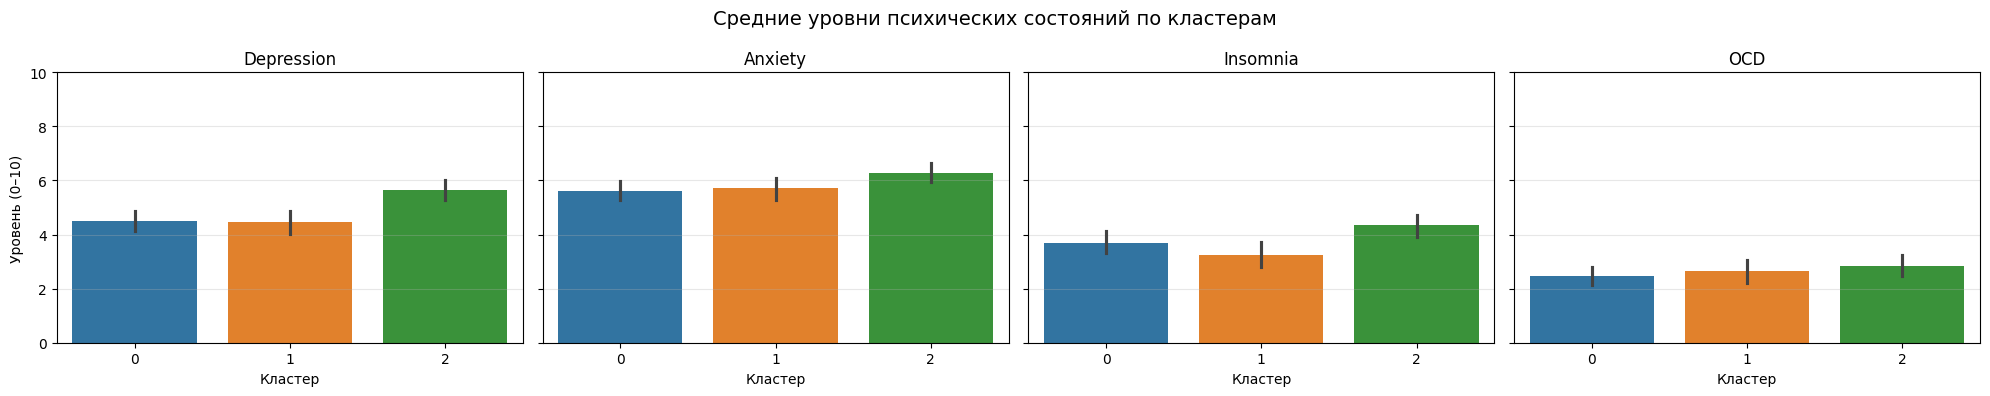

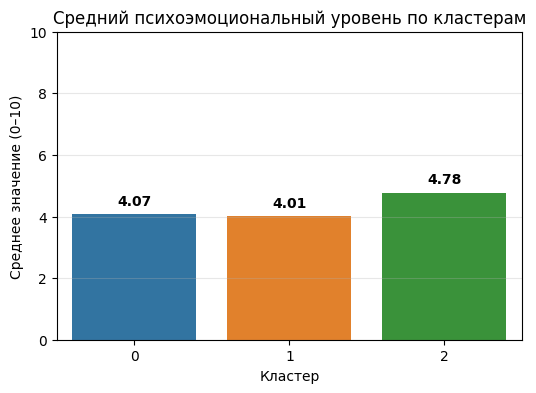

In [45]:
mental_cols = ['Depression', 'Anxiety', 'Insomnia', 'OCD']
df_mental = pd.concat([data_clean['Cluster'], data.loc[data_clean.index, mental_cols]], axis=1)

fig, axes = plt.subplots(1, 4, figsize=(20, 4), sharey=True)
for i, col in enumerate(mental_cols):
    sns.barplot(
        data=df_mental,
        x='Cluster',
        y=col,
        hue='Cluster',
        palette='tab10',
        dodge=False,
        ax=axes[i]
    )
    axes[i].legend_.remove()
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Кластер')
    axes[i].set_ylim(0, 10)
    axes[i].grid(True, axis='y', alpha=0.3)
    if i == 0:
        axes[i].set_ylabel('Уровень (0–10)')
    else:
        axes[i].set_ylabel('')

plt.suptitle('Средние уровни психических состояний по кластерам', fontsize=14)
plt.tight_layout()
plt.show()

df_mental['Mean mental score'] = df_mental[mental_cols].mean(axis=1)
mental_avg = df_mental.groupby('Cluster')['Mean mental score'].mean().reset_index()

plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=mental_avg,
    x='Cluster',
    y='Mean mental score',
    hue='Cluster',
    palette=sns.color_palette('tab10', n_colors=len(mental_avg)),
    dodge=False
)
ax.legend_.remove()

for i, val in enumerate(mental_avg['Mean mental score']):
    ax.text(i, val + 0.2, f"{val:.2f}", ha='center', va='bottom', fontweight='bold')

plt.title('Средний психоэмоциональный уровень по кластерам')
plt.ylabel('Среднее значение (0–10)')
plt.xlabel('Кластер')
plt.ylim(0, 10)
plt.grid(True, axis='y', alpha=0.3)
print('\n')
plt.show()

### 📊 Связь музыкальных предпочтений с психоэмоциональным состоянием

На основе анализа психоэмоциональных показателей можно сделать следующие выводы:

---

#### 🟩 Кластер 2 — эмоционально перегруженные меломаны
- Пользователи из этого кластера проявляют **наиболее высокие уровни депрессии, тревожности и бессонницы**.
- Их музыкальный профиль охватывает **много разнообразных и насыщенных жанров** — от металла и рока до lo-fi и фолка.
- Это может указывать на **попытку справиться с внутренним напряжением через музыку**, либо на то, что такие жанры выбираются людьми с уже высоким уровнем эмоционального напряжения.
- Высокая музыкальная вовлечённость — **возможно, форма самотерапии**, но не всегда эффективно снижающая стресс.

---

#### 🟦 Кластер 0 — умеренно уравновешенные слушатели
- Состояние участников сбалансировано, но не идеально: показатели тревожности и бессонницы не самые низкие.
- Эти люди **слушают музыку умеренно и довольно разносторонне**, но не в эмоционально напряжённых жанрах.
- Такое распределение может говорить о том, что **музыка не является для них главным инструментом эмоциональной регуляции**, а скорее привычной фоново-социальной активностью.

---

#### 🟧 Кластер 1 — молодые и устойчивые
- Самые **низкие уровни психоэмоционального стресса**, особенно по депрессии и бессоннице.
- Ядро их музыкального вкуса — **современная популярная музыка с позитивной и энергичной атмосферой** (pop, k-pop, R&B, hip-hop).
- Это может указывать на то, что **простая, ритмичная и социально вовлечённая музыка** способствует психологической устойчивости или, наоборот, её предпочитают устойчивые люди.

---

#### 💡 Обобщения и гипотезы
- **Не сами жанры вызывают стресс, но выбор жанров может быть связан с внутренним состоянием.**
- Чем **богаче и мрачнее музыкальный профиль**, тем **выше вероятность эмоционального напряжения**.
- Жанры с акцентом на **агрессию, драму или меланхолию** (metal, rock, lofi, folk) — чаще выбираются кластерами с повышенной тревожностью.
- Более **лёгкие и социальные жанры** (pop, R&B, hip-hop) — связаны с **низкими уровнями стресса**, что потенциально может использоваться в музыкальной терапии.